# Muon Lab
Crk97

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.integrate as integ
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.special as sf
#Globally fix plot styling
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

## Import Data

2074


407.0

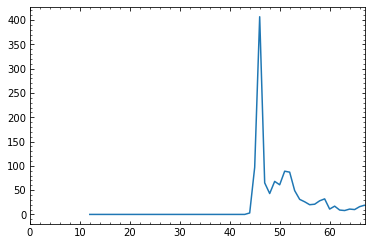

In [2]:
f = open('C:/Users/caden/Downloads/2-14-data-4days-good_Ck.Spe', 'r')
raw_data = np.genfromtxt(f, delimiter='\n')
print(len(raw_data))
plt.plot(raw_data)
f.close()
plt.xlim(0,67)
#plt.ylim(0,)
raw_data[46]

## Calibration

In [3]:
Bin = np.array([209,384,572,942,1491])
Bin_err = np.array([0,1,0,1,0]) #if point was in more than 1 bin

Pulse_Time = np.array([1.00,1.97,2.99,5.00,7.97])
time_err = .01  #Based of unit of oscilscope read - reads 2.989

In [4]:
m,b = np.polyfit(Bin,Pulse_Time,1)
def Bins2Time(x):
    return x*m + b

Text(0, 0.5, 'Time (us)')

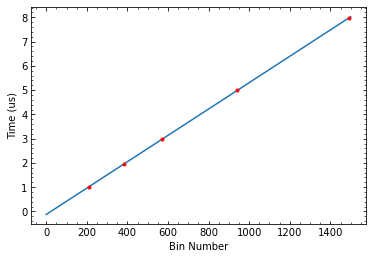

In [5]:
xfine = np.linspace(0,1500,1500)
plt.plot(xfine, Bins2Time(xfine))
plt.errorbar(Bin,Pulse_Time, yerr=time_err, xerr=Bin_err,fmt='r.', label='Data')
plt.xlabel('Bin Number')
plt.ylabel('Time (us)')

## Slice Data

In [6]:
#raw_data = f(raw_data)

In [7]:
## Manually pick nans from list

#skip=[0,1,2,3,4,5,6,7,8,9,10,11,12,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074]
#nan_sliced_data = np.delete(raw_data, skip)

## Array slice nans from list

nan_sliced_data = raw_data[12:2057:1]

## Check len
print(len(nan_sliced_data))

2045


In [8]:
## Slice initial Noise
noise_sliced_data = (nan_sliced_data[50:2030:1])
#noise_sliced_data = nan_sliced_data[0:2040]
print(len(noise_sliced_data))

1980


## Raw data graph for report

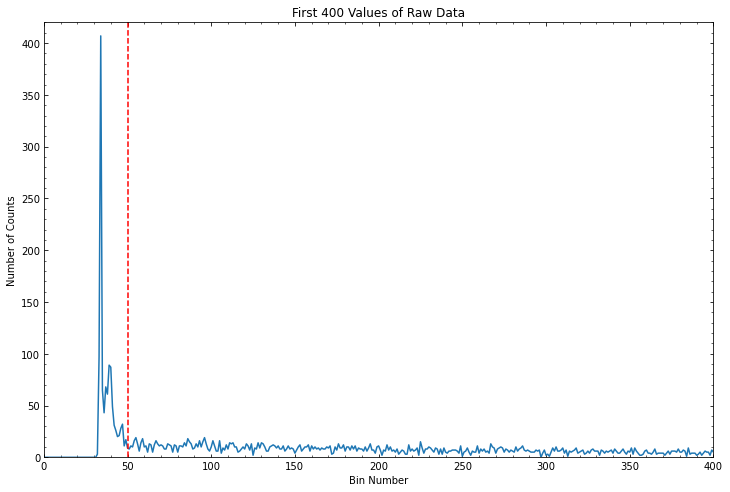

In [56]:
raw_x = np.arange(len(nan_sliced_data))
plt.plot(raw_x, nan_sliced_data)
#plt.errorbar(raw_x, nan_sliced_data, yerr=np.sqrt(nan_sliced_data), fmt='-')
plt.axvline(x=50, color='red',linestyle='--',label='Where we cut')
plt.xlim(0,400)
plt.ylim(0,420)

plt.title("First 400 Values of Raw Data")
plt.xlabel('Bin Number')
plt.ylabel('Number of Counts')

#plt.legend(fontsize='large')
plt.gcf().set_size_inches(12,8)
#plt.savefig('raw_data.png',dpi=1000)

## ReBinning Loop

In [10]:
# Determine number of bins
# using noise_sliced_data as old array and converting to new_bins array

bins = 18
step_size = len(noise_sliced_data) / bins

print(f"""#old bins = {len(noise_sliced_data)}
#new bins = {bins}
Old_bins per New_bin increment = {step_size}""")

#old bins = 1980
#new bins = 18
Old_bins per New_bin increment = 110.0


In [11]:
new_bins = np.zeros(bins)

In [12]:
# Loop 
index = 0
step = int(step_size)
for i in range(bins):
    new_bins[i] = np.sum(noise_sliced_data[index:index+step:1])
    index += step

In [13]:
print("length =",len(new_bins))


length = 18


<ErrorbarContainer object of 3 artists>

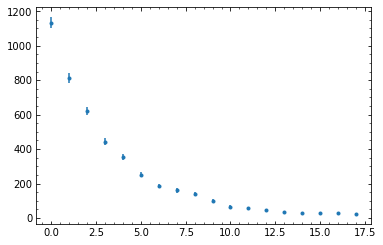

In [14]:
#plt.plot(newArray,'o')
error = np.sqrt(new_bins)
grid = np.arange(bins)

plt.errorbar(grid,new_bins,error,fmt='.')

## Curve Fitting

In [15]:
def ymodel(x,a,b,c):
    return a*np.exp(-x/b)+c

In [16]:
x = Bins2Time(grid*step_size+50)
y = new_bins
sigma_y = error

# Since we will call curve_fit more than once, just redefine sigma_y
(p, C) = opt.curve_fit(ymodel, x,y,sigma=error,
                       absolute_sigma=True)
sigp = np.sqrt(np.diag(C))
chisq = np.sum(((y - ymodel(x, *p)) / sigma_y)**2)
dof = len(y) - len(p)
Q = sf.gammaincc(0.5*dof, 0.5*chisq)

print(f"""Best fit:
a1 = {p[0]} +/- {sigp[0]}
a2 = {p[1]} +/- {sigp[1]}
a3 = {p[2]} +/- {sigp[2]}
chisq = {chisq}
dof = {dof}
goodness of fit = {Q}""")

Best fit:
a1 = 1178.614078379617 +/- 27.657565645357078
a2 = 1.9876420249129103 +/- 0.05572579059441535
a3 = 17.8115785146865 +/- 3.125005181262368
chisq = 10.315665243908361
dof = 15
goodness of fit = 0.7994279417593585


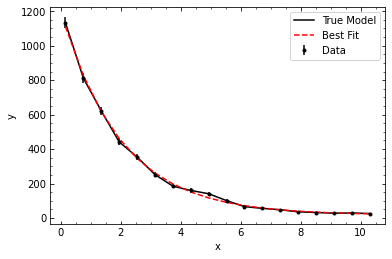

In [17]:
plt.errorbar(x, y, yerr=sigma_y, fmt='k.', label='Data')
plt.plot(x, y, 'k-', label='True Model')
plt.plot(x, ymodel(x, *p), 'r--', label='Best Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(numpoints=1, loc=0)
plt.minorticks_on()

## Calibration

In [18]:
Bin = np.array([209,384,572,942,1491])
Bin_err = np.array([0,1,0,1,0]) #if point was in more than 1 bin

Pulse_Time = np.array([1.00,1.97,2.99,5.00,7.97])
time_err = .01  #Based of unit of oscilscope read - reads 2.989

In [19]:
m,b = np.polyfit(Bin,Pulse_Time,1)
def Bins2Time(x):
    return x*m + b

(0.0, 8.5)

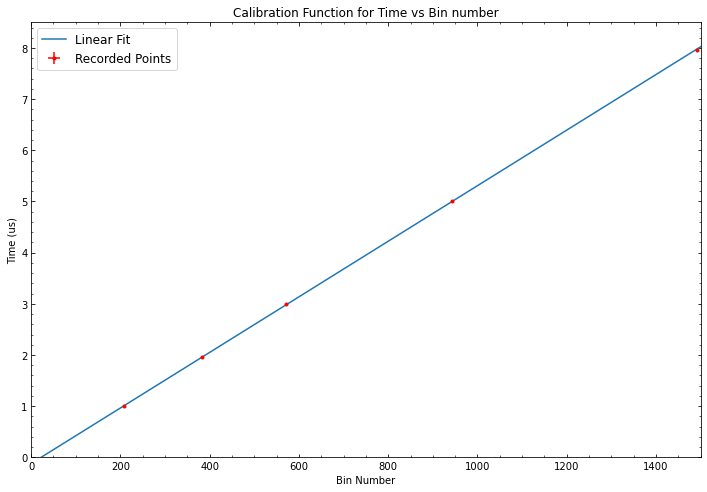

In [20]:
xfine2 = np.linspace(0,1600,1500)
plt.plot(xfine2, Bins2Time(xfine2),label= "Linear Fit")
plt.errorbar(Bin,Pulse_Time, yerr=time_err, xerr=Bin_err,fmt='r.', label='Recorded Points')
#plt.minorticks_off()
plt.xlim(0,1500)
plt.title("Calibration Function for Time vs Bin number")
plt.xlabel('Bin Number')
plt.ylabel('Time (us)')
plt.legend()
plt.plot()
plt.legend(fontsize='large')
plt.gcf().set_size_inches(12,8)
plt.ylim(0,8.5)
#plt.savefig('calibration.png',dpi=1000)

## Finding $\mu$

### avg value via integration

In [21]:
area = integ.quad(ymodel, 0, 10, args=(p[0],p[1],p[2]))
print(area)

(2505.4770719649564, 2.781638332965915e-11)


In [22]:
avg = area[0]/10
print(avg)

250.54770719649565


In [23]:
calc_time = Bins2Time(avg)
print(calc_time)

1.2382661812260818


### avg value via array and mean

In [24]:
xfine = np.linspace(0,10,10000)
fit_data = (ymodel(xfine, *p))
fit_mean = np.mean(fit_data)
fit_mean

250.58375411525344

In [25]:
over = np.argwhere(fit_data > fit_mean + .13)
under = np.argwhere(fit_data < fit_mean - .13)
datay = np.delete(fit_data, under)
datax = np.delete(datay, over)
print(datax)

[250.66589371 250.54876043]


In [26]:
np.where(fit_data == datax[0])

(array([3223], dtype=int64),)

In [27]:
fit_mean

250.58375411525344

In [28]:
mean_x_bin = xfine[3134]

In [29]:
est_time = Bins2Time((mean_x_bin*step_size)+50)
print(est_time)

2.0216573420397363


## Final Plotting

In [30]:
Bins2Time(x*99+50)

array([0.22905893, 0.55034616, 0.87163338, 1.19292061, 1.51420783,
       1.83549506, 2.15678228, 2.47806951, 2.79935673, 3.12064396,
       3.44193118, 3.76321841, 4.08450563, 4.40579286, 4.72708008,
       5.04836731, 5.36965453, 5.69094176])

(0.0, 1200.0)

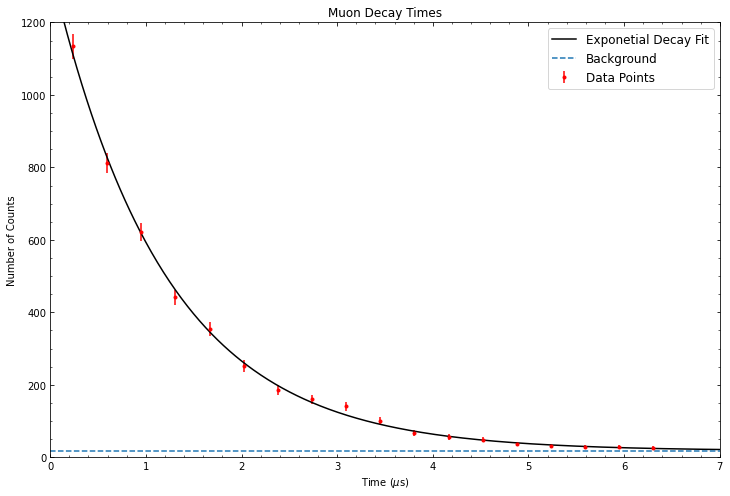

In [31]:
grid2 =np.linspace(-1,20,1000)
plt.errorbar(Bins2Time(x*(step_size)+50), y, yerr=sigma_y, fmt='r.',label='Data Points')
plt.plot(Bins2Time(grid2*(step_size)+50), ymodel(grid2, *p), 'k-', label='Exponetial Decay Fit')
#plt.axhline(y = fit_mean)
plt.axhline(y = p[2],linestyle="dashed",label='Background')
#plt.axvline(x = calc_time )
plt.xlabel('Time ($\mu$s)')
plt.ylabel('Number of Counts')
plt.legend(fontsize='large',numpoints=1, loc=0)
plt.minorticks_on()
plt.title("Muon Decay Times")
plt.gcf().set_size_inches(12,8)
plt.xlim(0,7)
plt.ylim(0,1200)
#plt.savefig('muon_decay.png',dpi=1000)

Text(0.5, 1.0, 'Muon Decay Times')

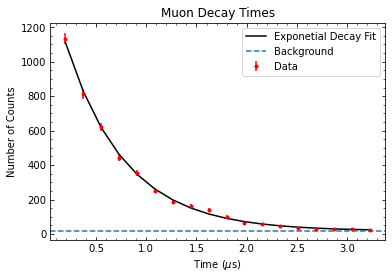

In [32]:
plt.errorbar(Bins2Time(x*(step_size/2)+50), y, yerr=sigma_y, fmt='r.',label='Data')
#plt.plot(Bins2Time(x*105+46), y, 'r.', label='Data Points')
plt.plot(Bins2Time(x*(step_size/2)+50), ymodel(x, *p), 'k-', label='Exponetial Decay Fit')
#plt.axhline(y = fit_mean)
plt.axhline(y = p[2],linestyle="dashed",label='Background')
#plt.axvline(x = calc_time )
plt.xlabel('Time ($\mu$s)')
plt.ylabel('Number of Counts')
plt.legend(numpoints=1, loc=0)
plt.minorticks_on()
plt.title("Muon Decay Times")
#plt.xlim(2,4)

<ErrorbarContainer object of 3 artists>

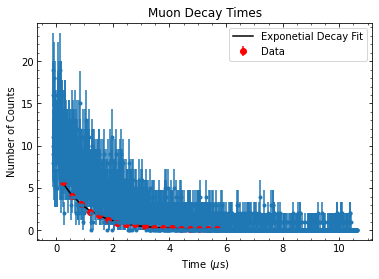

In [33]:
#plt.figsize(10,10)
plt.errorbar(Bins2Time(x*99+50), y/198, yerr=sigma_y/198, fmt='ro',label='Data')
#plt.plot(Bins2Time(x*105+46), y, 'r.', label='Data Points')
plt.plot(Bins2Time(x*99+50), ymodel(x, *p)/198, 'k-', label='Exponetial Decay Fit')
#plt.axhline(y = fit_mean)
p#lt.axhline(y = y[9],linestyle="dashed")
#plt.axvline(x = calc_time )
plt.xlabel('Time ($\mu$s)')
plt.ylabel('Number of Counts')
plt.legend(numpoints=1, loc=0)
plt.minorticks_on()
plt.title("Muon Decay Times")
#plt.xlim(2,4)
noise_x = np.arange(len(noise_sliced_data))
plt.errorbar(Bins2Time(noise_x), noise_sliced_data, yerr=np.sqrt(noise_sliced_data), fmt='.')